<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp

These problems are aligned with the reading assignment that's due next week. Suggestion: read the book before attempting these problems.

A) Determine $i_L(t)$ in the circuit below for $t\ge 0$ given that the switch was opened at $t = 0$, after it had been closed for a long time, $R_0 =5\mathrm{~\Omega}$, $R_1 = 10 \mathrm{~\Omega}$, $R_2 =20\mathrm{~\Omega}$, $L = 0.2\mathrm{~H}$, and $C = 6 \mathrm{~F}$.

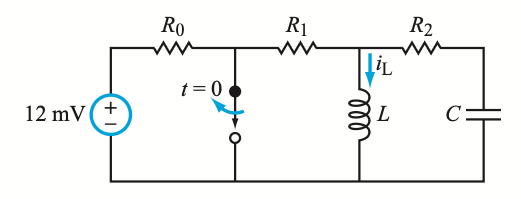

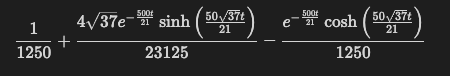

In [ ]:
Vin, V1, V2, V3, R0, R1, R2, L, C, t = sp.symbols('Vin, V1, V2, V3, R0, R1, R2, L, C, t', real=True, positive=True)
s = sp.symbols('s', real =True, positive = True)
subVals = {R0:5, R1:10, R2:20, L:sp.Rational(1, 5), C:6, Vin:sp.Rational(12, 1000)}

f2 = (V2 - (Vin/s)) / (R0 + R1) + V2 / (L*s) + (V2 - V3) / R2
f3 = (V3 - V2) / R2 + (V3 / (1 / (C*s)))

sol = sp.solve([f2, f3], (V2, V3))
sol = sp.simplify(sol)
sol_L = sol[V2] / (L*s)
sol_L = sol_L.subs(subVals)
sol_L = sol_L.apart()
sol = sp.inverse_laplace_transform(sol_L, s, t)
print("ANS:")
sol

ANS:


1/1250 + 8999*sqrt(80955001)*exp(-9001*t/420)*sinh(sqrt(80955001)*t/420)/101193751250 - exp(-9001*t/420)*cosh(sqrt(80955001)*t/420)/1250

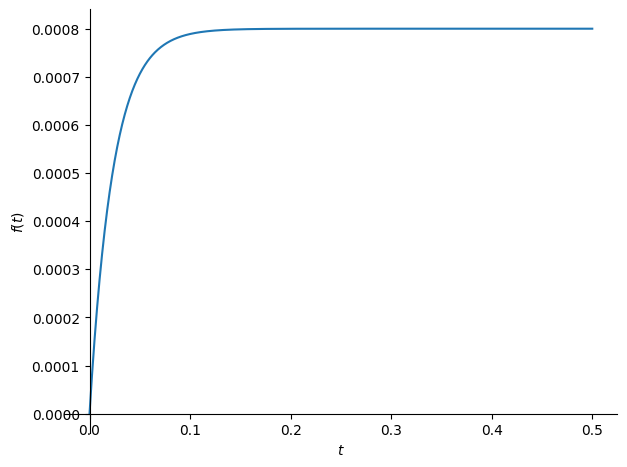

In [ ]:
sp.plot(sol, (t, 0, .5))

B) Determine $v_{\rm out}(t)$ in the circuit below given that $v_s(t)=11u(t)\mathrm{~V}$ ,$R_1 =2\mathrm{~\Omega}$, $R_2 =4\mathrm{~\Omega}$, $R_3 = 6 \mathrm{~\Omega}$, $L=1\mathrm{~H}$, and $C = 0.5\mathrm{~F}$.

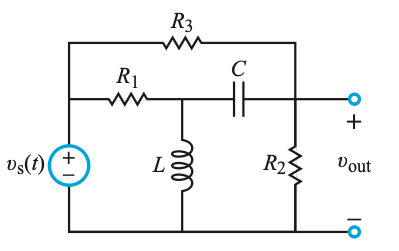

In [ ]:
Vs, Vo, V1, R1, R2, R3, L, C, s, t = sp.symbols('Vs Vo V1 R1 R2 R3 L C s t', real = True, positive = True)

subVals = {Vs:11/s, R1:2, R2:4, R3:6, L:1, C:sp.Rational(1, 2)}
Z1 = 1 / (C*s)
f1 = (V1 - Vs) / R1 + V1/(L*s) + (V1 - Vo) / Z1
f2 = Vo/R2 + (Vo-V1)/Z1 + (Vo-Vs)/R3

sol_s = sp.simplify(sp.solve([f1, f2], [V1, Vo]))
sol_s = sol_s.subs(subVals)
sol = sp.simplify(sp.inverse_laplace_transform(sol_s[Vo], s, t))
sol.n(3)

0.00265*(1.66e+3*exp(17*t/22) - 5.13e+3*sin(sqrt(151)*t/22) + 1.36e+3*cos(sqrt(151)*t/22))*exp(-17*t/22)

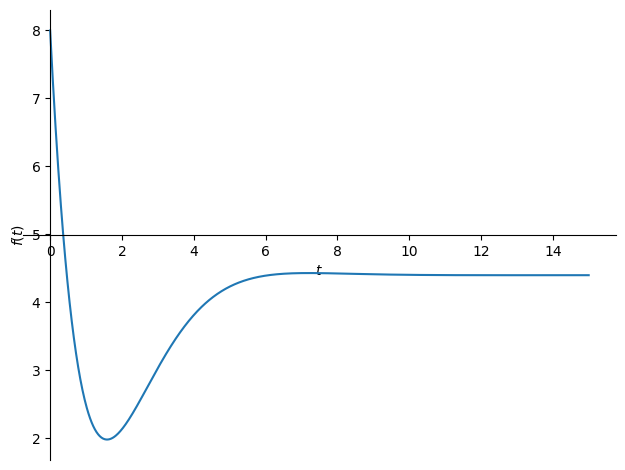

In [ ]:
sp.plot(sol, (t, 0, 15))

Ans:

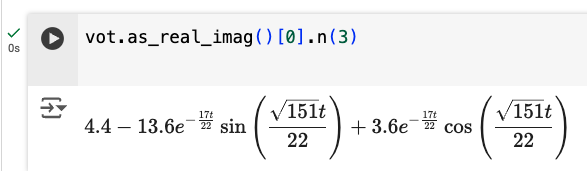

C) The current source shown in the circuit below is given by the displayed waveform. Determine $v_{\rm out}(t)$ for $t \ge 0$ given that $R_1 =1\mathrm{~\Omega}$, $R_2 = 0.5 \mathrm{~\Omega}$, and $L=0.5\mathrm{~H}$.

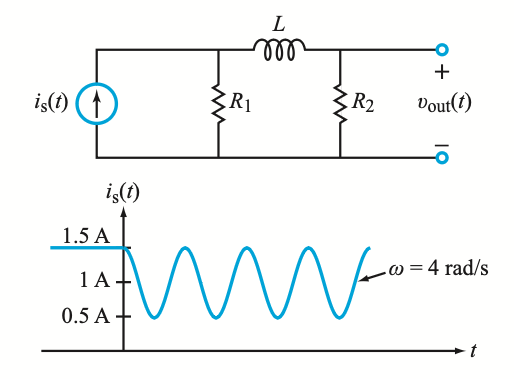

In [ ]:
Is, V1, Vo, R1, R2, L, s, t = sp.symbols('Is, V1, Vo, R1, R2, L, s, t', real=True, positive = True)
i_s = sp.simplify(sp.laplace_transform(1 + sp.Rational(1, 2)*sp.cos(4*t), t, s))

subVals = {Is:i_s[0], R1:1, R2:sp.Rational(1, 2), L:sp.Rational(1,2)}

f1 = -Is + V1 / R1 + (V1 - Vo) / (L*s)
f2 = (Vo - V1) / (L*s) + Vo / R2

sol_s = sp.simplify(sp.solve([f1, f2], [V1, Vo]))
sol_s = sol_s.subs(subVals)
sol_s = sol_s[Vo].apart()
sol = (sp.inverse_laplace_transform(sol_s, s, t))
#sol.simplify()
sol


2*sin(4*t)/25 + 3*cos(4*t)/50 + 1/3 - 59*exp(-3*t)/150

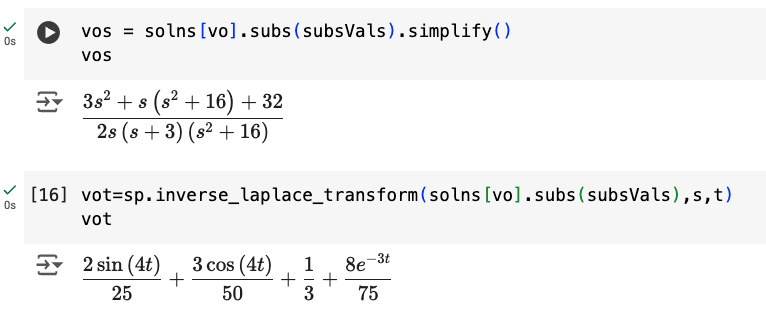

D) In the SMD system shown below, $v_x(t)$ is the input velocity of the platform and $v_y(t)$ is the output velocity of the $200\mathrm{~kg}$ mass.

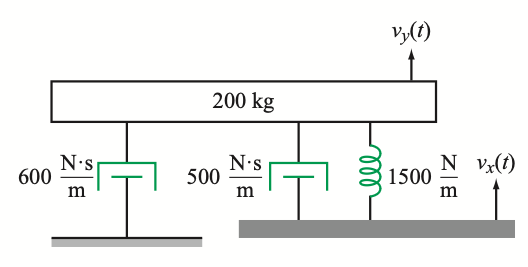

(a) Draw the equivalent s-domain circuit.

(b) Determine the system transfer function.

(c) Compute the impulse response.

(d) Determine the frequency response.

(e) Compute the response to the step vx(t) = u(t) (m/s).

In [ ]:
Vx, Vy, R1, R2, L, C, s, t = sp.symbols('Vx, Vy, R1, R2, L, C, s, t', real=True, positive = True)

subVals = {R1: sp.Rational(1, 500), R2:sp.Rational(1, 600), L: sp.Rational(1, 1500), C:sp.Rational(1, 200)}

f1 = (Vy - Vx) / (s*L) + (Vy - Vx) / R1 + Vy / R2 + Vy / (C/s)

sol_s = sp.solve([f1], [Vy])
Hs = sp.simplify(sol_s[Vy]/Vx)
Hs = Hs.subs(subVals)
Hs = Hs.apart()
ht = (sp.inverse_laplace_transform(Hs, s, t))

omega = sp.symbols('omega', real=True, positive = True)
j = sp.I

hjw = Hs.subs(s, j*omega)

Vy_s = sol_s[Vy].subs(Vx, 1/s)
Vy_s = Vy_s.subs(subVals)
Vy_s = Vy_s.apart()
Vy_t = sp.inverse_laplace_transform(Vy_s, s, t)



In [ ]:
# b.
Hs

5/(2*s + 5)

In [ ]:
# c.
ht

5*exp(-5*t/2)/2

In [ ]:
# d.
hjw

5/(2*I*omega + 5)

In [ ]:
# e.
Vy_t

1 - exp(-5*t/2)

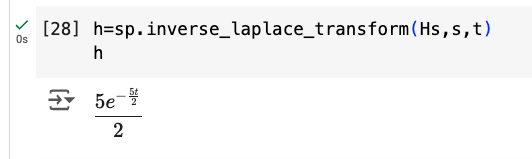

E) For the circuit shown below, determine (a) $H(s)=Vo/Vs$ and (b) $h(t)$ given that $R_1 = R_2 = 100\mathrm{~\Omega}$ and $C_1 = C_2 = 1\mathrm{~\mu F}$.

FYI: This particular feedback network setup is called a "Sallen-Key" configuration. Google it!

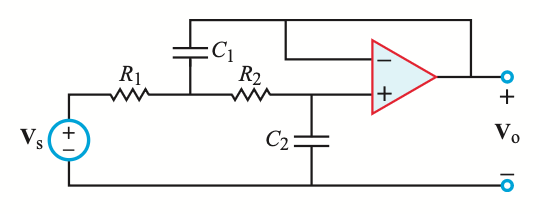

In [ ]:
Vs, V1, Vo, R1, R2, C1, C2, s, t = sp.symbols('Vs, V1, Vo, R1, R2, C1, C2, s, t', real=True, positive = True)

subVals = {R1:100, R2:100, C1:1e-6, C2:1e-6}

f1 = (V1 - Vs) / R1 + (V1 - Vo) / (1 / (C1*s)) + (V1 - Vo) / R2
f2 = (Vo - V1) / R2 + Vo / (1 / (C2*s))

sol_s = sp.simplify(sp.solve([f1, f2], [V1, Vo]))
sol_s = sol_s.subs(subVals)
sol = (sp.inverse_laplace_transform(sol_s[Vo]/Vs, s, t))
sol

100000000.0*t*exp(-10000.0*t)

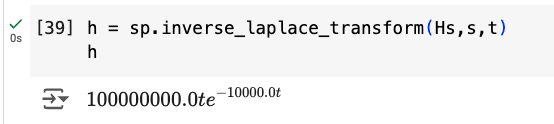